# Download Data

In [1]:
 ! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kyuzo93","key":"3027ee2fc475c3326fe83d65877ead4f"}'}

In [3]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                             title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ahsan81/hotel-reservations-classification-dataset               Hotel Reservations Dataset                   480KB  2023-01-04 12:50:31           2501         93  1.0              
thedevastator/global-fossil-co2-emissions-by-country-2002-2022  Emissions by Country, 2002-2022              621KB  2023-01-02 20:10:36           1329         50  1.0              
die9origephit/fifa-world-cup-2022-complete-dataset              Fifa World Cup 2022: Complete Dataset          7KB  2022-12-18 22:51:11           5791        184  1.0              
rakkesharv/spotify-top-10000-streamed-songs                     Spotify Top 10000 Streamed Song

In [7]:
! kaggle datasets download -d goelyash/disney-hotstar-tv-and-movie-catalog

  0% 0.00/532k [00:00<?, ?B/s]
100% 532k/532k [00:00<00:00, 139MB/s]


In [8]:
! unzip disney-hotstar-tv-and-movie-catalog.zip -d .

Archive:  disney-hotstar-tv-and-movie-catalog.zip
  inflating: ./hotstar.csv           


In [9]:
! pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Data Understanding

In [10]:
# Library
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

In [11]:
df = pd.read_csv('hotstar.csv')
df.head()

,hotstar_id,title,description,genre,year,age_rating,running_time,seasons,episodes,type
0,1000232077,Ram Gopal Varma ki Aag,Dacoit Babban Singh is on the loose in Kaligan...,Action,2007,U/A 13+,152.0,NaN,NaN,movie
1,1000164652,Niyogam,"A mediator between the deity and the devotees,...",Drama,1997,U/A 13+,101.0,NaN,NaN,movie
2,1000105823,Injakkadan Mathai & Sons,"Injakkadan Mathai and his sons, Roy and Thanka...",Action,1993,U/A 7+,122.0,NaN,NaN,movie
3,1000163530,Viyarppinte Vila,An impoverished landlord lives in past glory a...,Drama,1962,U,149.0,NaN,NaN,movie
4,1820041764,Ek Mulaqat,"Two strangers, Avi and Nikita meet at a party ...",Romance,2019,U,7.0,NaN,NaN,movie


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6652 entries, 0 to 6651
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hotstar_id    6652 non-null   int64  
 1   title         6652 non-null   object 
 2   description   6652 non-null   object 
 3   genre         6652 non-null   object 
 4   year          6652 non-null   int64  
 5   age_rating    6652 non-null   object 
 6   running_time  4419 non-null   float64
 7   seasons       2233 non-null   float64
 8   episodes      2233 non-null   float64
 9   type          6652 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 519.8+ KB


In [13]:
df.isnull().sum()

hotstar_id         0
title              0
description        0
genre              0
year               0
age_rating         0
running_time    2233
seasons         4419
episodes        4419
type               0
dtype: int64

In [14]:
df.shape
print(2117/6228*100,4128/6228*100)

33.99165061014772 66.28131021194605


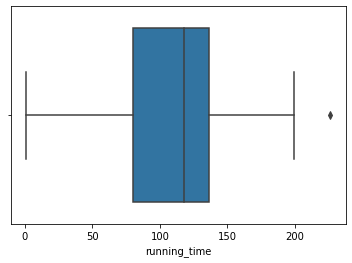

In [15]:
sns.boxplot(x=df['running_time'])

In [16]:
q1 = df['running_time'].quantile(0.25)
q3 = df['running_time'].quantile(0.75)
iqr = q3 - q1

print(iqr)

56.0


In [17]:
d = df[(df['running_time'] > q1 - 1.5 * iqr) & (df['running_time'] < q3 + 1.5 * iqr)]
#taking the mean 
mean=d['running_time'].mean()
print(mean)

101.19646899049343


In [18]:
d=df.copy()
d['running_time'].fillna(value=mean, inplace=True)

In [19]:
d["running_time"].isnull().sum()

0

In [20]:
d2=d.copy()
d2['running_time'].fillna(df['running_time'].mean())

0       152.000000
1       101.000000
2       122.000000
3       149.000000
4         7.000000
           ...    
6647    101.196469
6648    101.196469
6649    101.196469
6650    101.196469
6651    101.196469
Name: running_time, Length: 6652, dtype: float64

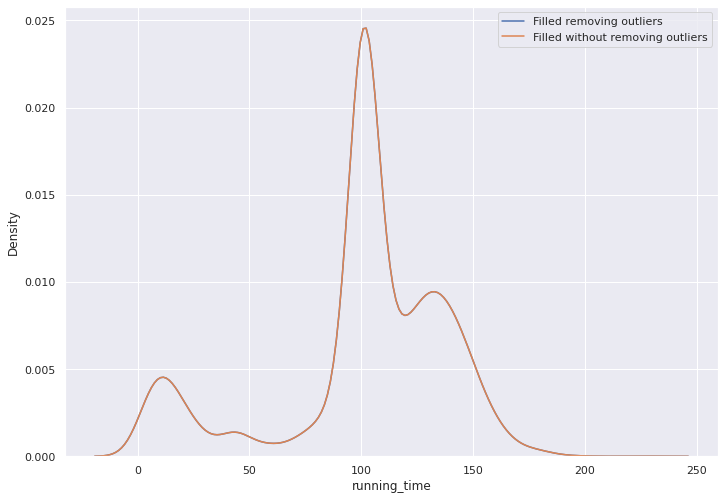

In [21]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(x="running_time", data=d)
sns.kdeplot(data=d2,x='running_time')
plt.legend(labels=["Filled removing outliers","Filled without removing outliers"]);

In [22]:
df['running_time'].fillna(mean, inplace=True)

In [23]:
#filling the null values with mean
df['episodes'].fillna(df['episodes'].median(), inplace=True)
df['seasons'].fillna(df['seasons'].median(), inplace=True)

In [24]:
df.isnull().sum()

hotstar_id      0
title           0
description     0
genre           0
year            0
age_rating      0
running_time    0
seasons         0
episodes        0
type            0
dtype: int64

In [25]:
df["seasons"].unique()

array([ 1., 15.,  2., 27.,  8., 23.,  6.,  9.,  3.,  4., 12.,  5.,  7.,
       31., 10., 11., 21., 34., 13., 18., 28., 16., 14., 35., 73., 45.,
       53., 67., 33., 22., 43., 17., 19., 36., 29., 30., 26., 24., 25.,
       38.])

In [26]:
df["type"].unique()

array(['movie', 'tv'], dtype=object)

In [27]:
df["genre"].unique()

array(['Action', 'Drama', 'Romance', 'Historical', 'Comedy', 'Teen',
       'Adventure', 'Mythology', 'Animation', 'Thriller', 'Horror',
       'Superhero', 'Crime', 'Family', 'Mystery', 'Science',
       'Animals & Nature', 'Documentary', 'Standup Comedy', 'Musical',
       'Kids', 'Science Fiction', 'Biopic', 'Concert Film', 'Food',
       'Sport', 'Fantasy', 'Shorts', 'Reality', 'Docudrama', 'Travel',
       'Talk Show', 'Awards', 'Lifestyle', 'Kabaddi', 'Football'],
      dtype=object)

In [28]:
df["age_rating"].unique()

array(['U/A 13+', 'U/A 7+', 'U', 'A', 'U/A 16+', 'G'], dtype=object)

In [29]:
df.shape

(6652, 10)

## EDA

In [30]:
#count the  different counts of genre
df['genre'].value_counts()

Drama               1933
Comedy               782
Romance              634
Action               611
Reality              396
Thriller             341
Family               254
Animation            228
Documentary          197
Sport                180
Animals & Nature     120
Horror               109
Kids                 106
Crime                 94
Mythology             80
Talk Show             73
Superhero             62
Standup Comedy        51
Adventure             47
Biopic                45
Historical            41
Science Fiction       40
Mystery               35
Science               33
Teen                  31
Awards                28
Lifestyle             24
Food                  18
Musical               16
Concert Film          13
Shorts                 9
Travel                 8
Fantasy                6
Docudrama              5
Kabaddi                1
Football               1
Name: genre, dtype: int64

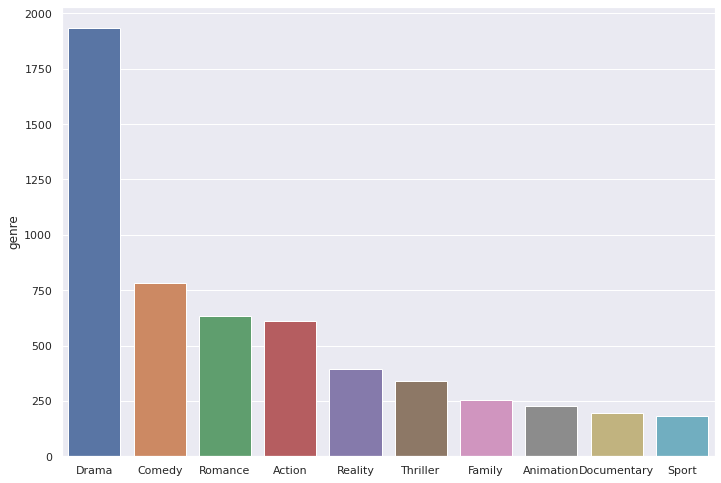

In [31]:
#graph for showing the different instances of years
data=df['genre'].value_counts().sort_values(ascending=False)[:10]
sns.barplot(x=data.index, y=data)

In [32]:
#count the unique years
print("The total number of unique years in the dataset",df['year'].nunique())
#count the  different counts of years
df['year'].value_counts()

The total number of unique years in the dataset 77


2021    553
2017    515
2019    500
2022    498
2018    449
       ... 
1937      1
1942      1
1951      1
1960      1
1958      1
Name: year, Length: 77, dtype: int64

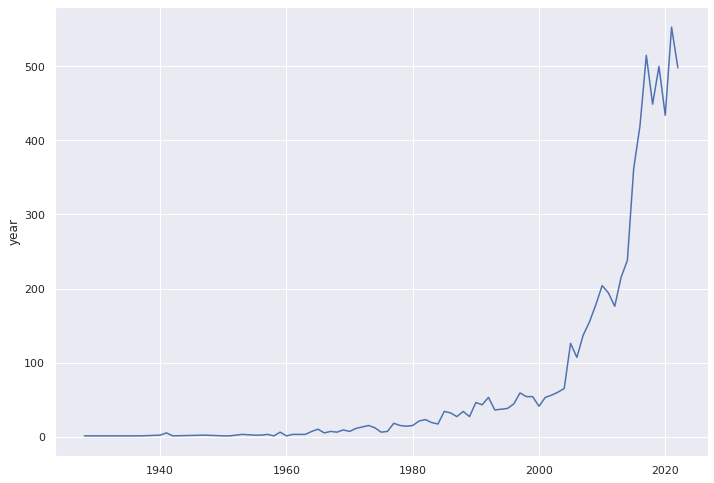

In [33]:
#graph showing the increase in the number of titles per year
data=df['year'].value_counts().sort_values(ascending=False)
sns.lineplot(x=data.index, y=data)

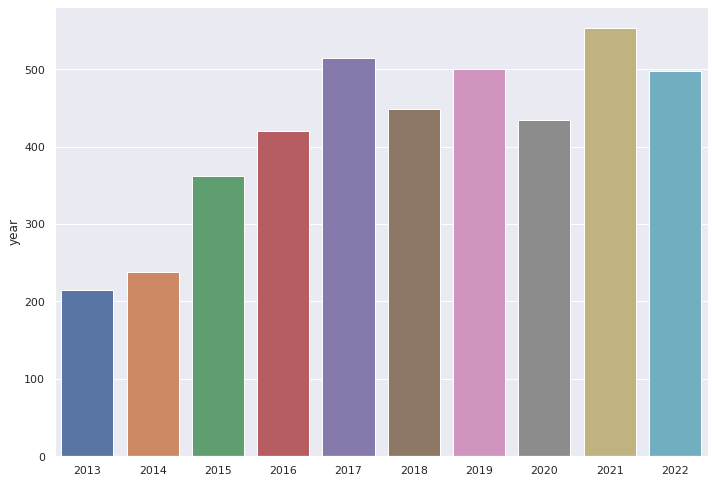

In [34]:
#graph for showcasing the different number of titles per year
data=df['year'].value_counts().sort_values(ascending=False)[:10]
sns.barplot(x=data.index, y=data)

In [35]:
#unique count of age ratings
print("The total number of unique age ratings in the dataset",df['age_rating'].nunique())
#count the  different counts of age ratings
df['age_rating'].value_counts()

The total number of unique age ratings in the dataset 6


U/A 13+    2856
U          1253
U/A 16+    1134
U/A 7+     1098
A           310
G             1
Name: age_rating, dtype: int64

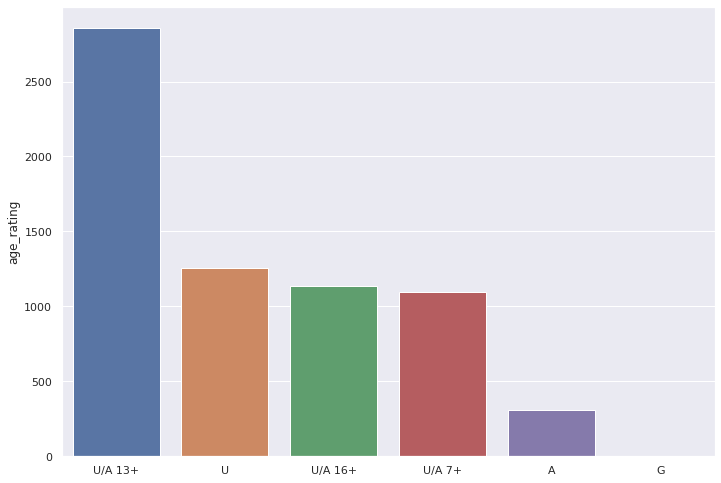

In [36]:
#graph for the top 7 age ratings
data=df['age_rating'].value_counts().sort_values(ascending=False)[:7]
sns.barplot(x=data.index, y=data);

In [37]:
#avg running time
print("The average run time of the episode is",round(df['running_time'].mean(),2))
#avg episodes
print("The average number of episode per season is",round(df['episodes'].median(),2))
#avg seasons
print("The average number of seasons per title is",round(df['seasons'].median(),2))

The average run time of the episode is 101.22
The average number of episode per season is 23.0
The average number of seasons per title is 1.0


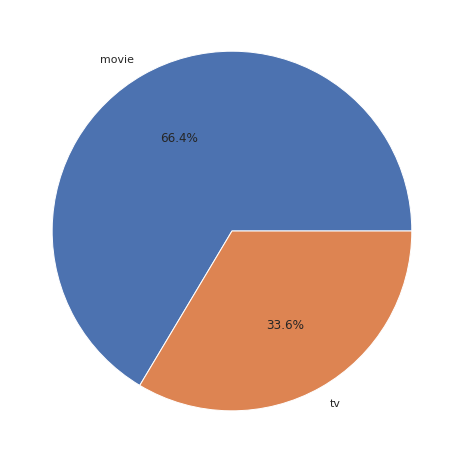

In [38]:
#the different types
df['type'].value_counts()
#pie chart 
plt.pie(df['type'].value_counts(), labels=df['type'].value_counts().index, autopct='%1.1f%%');

In [39]:
#group by year and get only values of type 'movie'
df_movie=df[df['type']=='movie']
df_series=df[df['type']=='tv']
data1=df_movie.groupby(df['year'])['type'].count()
data2=df_series.groupby(df['year'])['type'].count()
#graph for showing the yearly increase in the movies each year
# sns.lineplot(x=data.index, y=data)
#draw a histogram using data

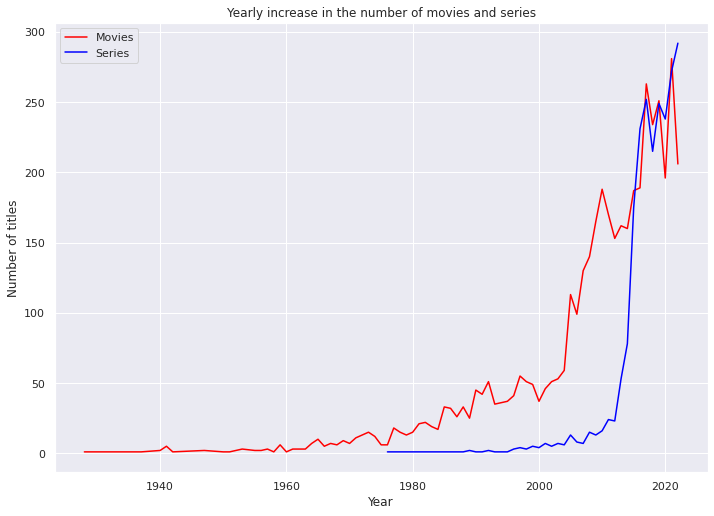

In [40]:
#line graphs
plt.plot(data1.index, data1.values, color='red', label='Movies')
plt.plot(data2.index, data2.values, color='blue', label='Series')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Number of titles')
plt.title('Yearly increase in the number of movies and series')
plt.show()

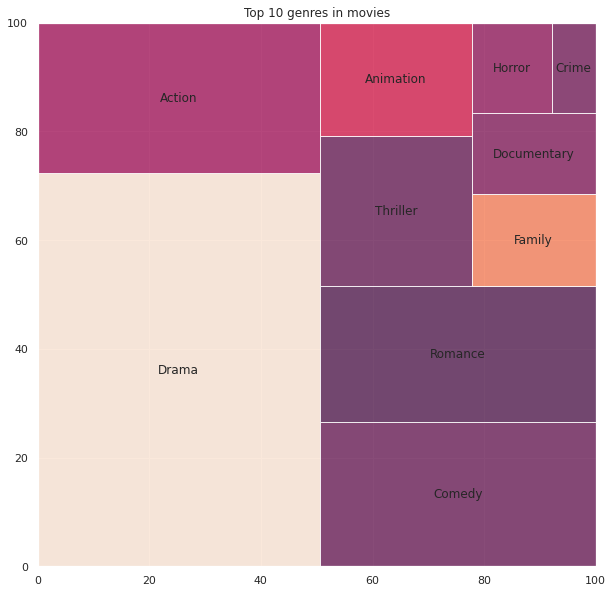

In [41]:
#top 10 genres in movies
data=df_movie['genre'].value_counts().sort_values(ascending=False)[:10]
#draw treemap
plt.figure(figsize=(10,10))
plt.title('Top 10 genres in movies')
squarify.plot(data,label=data.index, alpha=.8 )
plt.show()

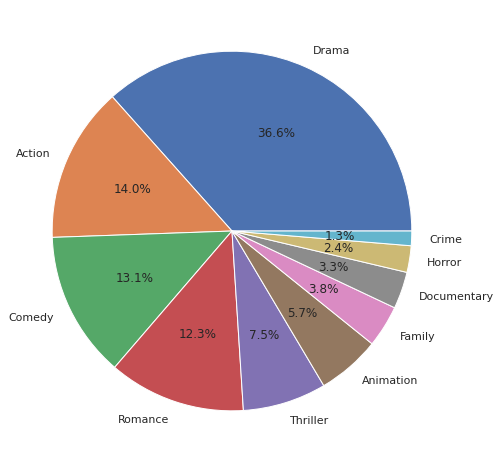

In [42]:
#draw a pie chart for the top 10 genres in movies
plt.pie(data.values, labels=data.index, autopct='%1.1f%%');
plt.show()

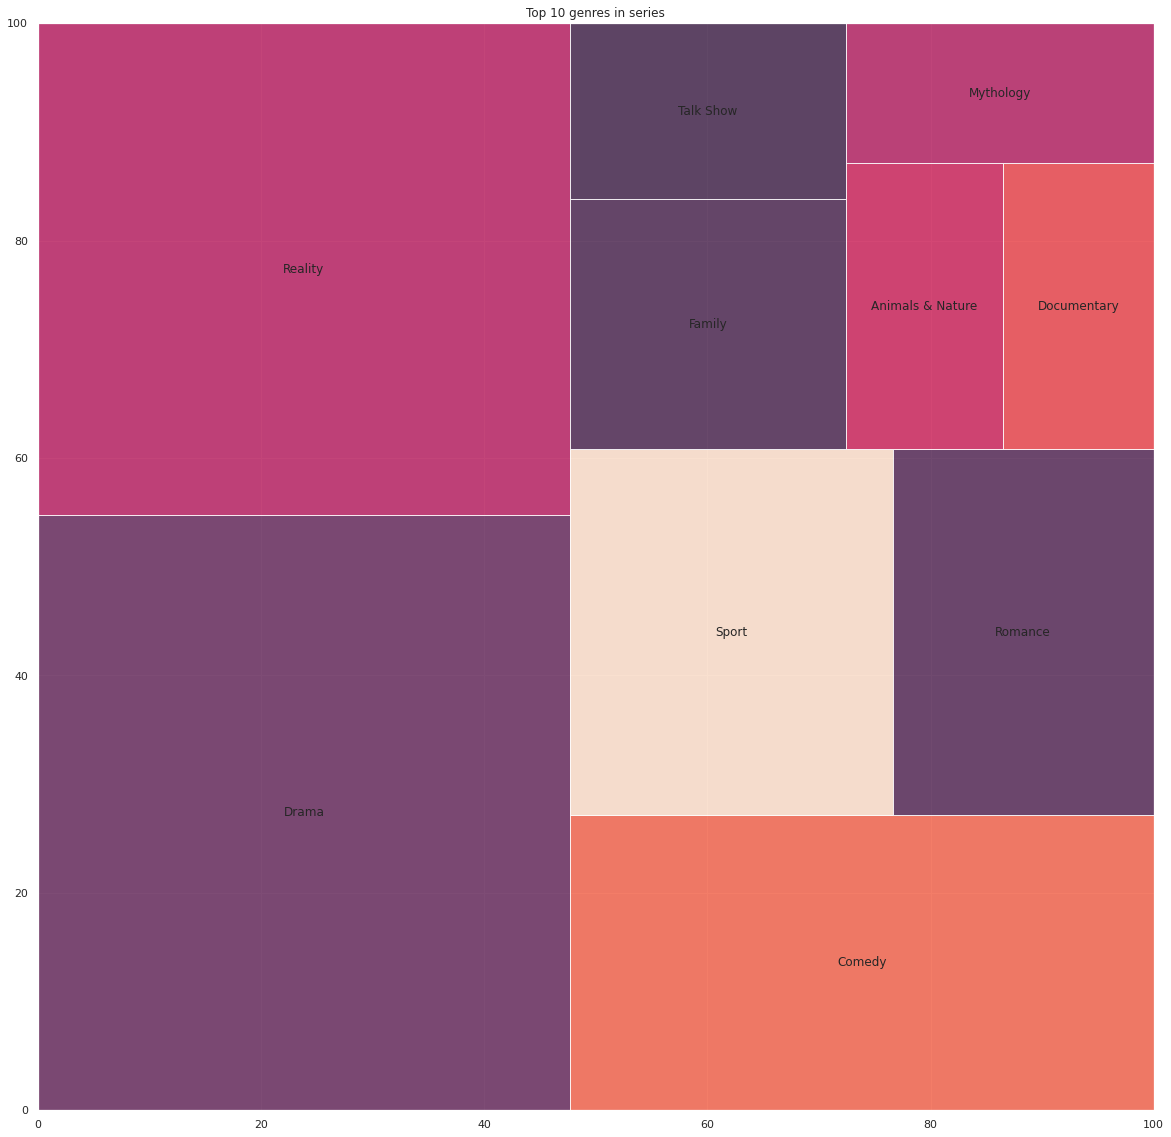

In [43]:
#top 10 genres in series
data=df_series['genre'].value_counts().sort_values(ascending=False)[:10]
#draw treemap
plt.figure(figsize=(20,20))
plt.title('Top 10 genres in series')
squarify.plot(data,label=data.index, alpha=.8 )
plt.show()

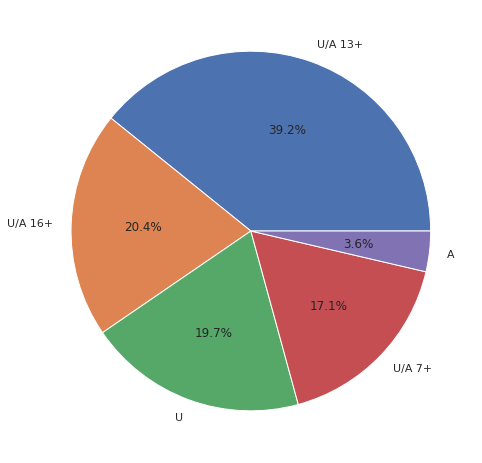

In [44]:
#age rating of movies and tv
data=df_movie['age_rating'].value_counts().sort_values(ascending=False)[:10]
#draw pie chart
plt.pie(data.values, labels=data.index, autopct='%1.1f%%');
plt.show()

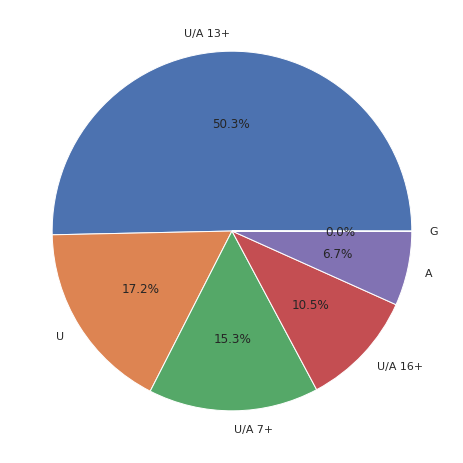

In [45]:
#age rating of tv
data=df_series['age_rating'].value_counts().sort_values(ascending=False)[:10]
#draw pie chart
plt.pie(data.values, labels=data.index, autopct='%1.1f%%');
plt.show()

In [46]:
#the biggest runtime for a movie
print("The biggest runtime for a movie is",round(df_movie['running_time'].max(),2))
#the biggest runtime for a series
print("The biggest runtime for a series is",round(df_series['running_time'].max(),2))

The biggest runtime for a movie is 226.0
The biggest runtime for a series is 101.2


# Data Preparation

In [47]:
# Create a new dataframe
category = pd.get_dummies(df.type)
df_new = pd.concat([df, category], axis=1)
df_new = df_new.drop(columns='type')
df_new

,hotstar_id,title,description,genre,year,age_rating,running_time,seasons,episodes,movie,tv
0,1000232077,Ram Gopal Varma ki Aag,Dacoit Babban Singh is on the loose in Kaligan...,Action,2007,U/A 13+,152.000000,1.0,23.0,1,0
1,1000164652,Niyogam,"A mediator between the deity and the devotees,...",Drama,1997,U/A 13+,101.000000,1.0,23.0,1,0
2,1000105823,Injakkadan Mathai & Sons,"Injakkadan Mathai and his sons, Roy and Thanka...",Action,1993,U/A 7+,122.000000,1.0,23.0,1,0
3,1000163530,Viyarppinte Vila,An impoverished landlord lives in past glory a...,Drama,1962,U,149.000000,1.0,23.0,1,0
4,1820041764,Ek Mulaqat,"Two strangers, Avi and Nikita meet at a party ...",Romance,2019,U,7.000000,1.0,23.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6647,1260003841,Anandyatree,"Popular Marathi singers, Suresh Wadkar, Swapni...",Concert Film,2019,U,101.196469,1.0,5.0,0,1
6648,1260108360,Cook Like a Chef,"This innovative, ground-breaking series featur...",Food,2001,U/A 16+,101.196469,1.0,39.0,0,1
6649,1260067695,Star Kids - Daddy Daddy O My Daddy,Vijay TV stars and their adorable tiny tots ar...,Reality,2021,U/A 13+,101.196469,1.0,1.0,0,1
6650,1260025773,Disney's Recess,Recess portrays the lives of six fourth-grader...,Comedy,1997,U,101.196469,3.0,65.0,0,1


In [48]:
# Convert values from dataframe into numpy array data type
description = df_new['description'].values
label = df_new[['tv', 'movie',]].values

In [49]:
# Data for training and testing
description_latih, description_test, label_latih, label_test = train_test_split(description, label, test_size=0.2)

In [50]:
# Tokenizer Function
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(description_latih)
sequences = tokenizer.texts_to_sequences(description_latih)
sekuens_latih = pad_sequences(
    sequences,
    maxlen=None,
    dtype='int32',
    padding='pre',
    truncating='pre',
    value=0.0)
sekuens_test = tokenizer.texts_to_sequences(description_test)
padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

# Modelling

In [51]:
# Embedding 
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [52]:
# Use of Callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nAkurasi telah mencapai >99%!")
      self.model.stop_training = True
callbacks = myCallback()

In [53]:
# Calling the fit() function
num_epochs = 50
history = model.fit(padded_latih, label_latih, epochs=num_epochs, callbacks=[callbacks],
                    validation_data=(padded_test, label_test), verbose=2)

Epoch 1/50
167/167 - 5s - loss: 0.5407 - accuracy: 0.7247 - val_loss: 0.4442 - val_accuracy: 0.7994 - 5s/epoch - 30ms/step
Epoch 2/50
167/167 - 1s - loss: 0.3289 - accuracy: 0.8641 - val_loss: 0.4027 - val_accuracy: 0.8279 - 1s/epoch - 7ms/step
Epoch 3/50
167/167 - 1s - loss: 0.2146 - accuracy: 0.9171 - val_loss: 0.4478 - val_accuracy: 0.8219 - 1s/epoch - 7ms/step
Epoch 4/50
167/167 - 1s - loss: 0.1316 - accuracy: 0.9528 - val_loss: 0.5223 - val_accuracy: 0.8137 - 1s/epoch - 7ms/step
Epoch 5/50
167/167 - 1s - loss: 0.0817 - accuracy: 0.9722 - val_loss: 0.6949 - val_accuracy: 0.8054 - 1s/epoch - 7ms/step
Epoch 6/50
167/167 - 1s - loss: 0.0530 - accuracy: 0.9803 - val_loss: 0.9006 - val_accuracy: 0.8167 - 1s/epoch - 7ms/step
Epoch 7/50

Akurasi telah mencapai >99%!
167/167 - 1s - loss: 0.0184 - accuracy: 0.9930 - val_loss: 1.2687 - val_accuracy: 0.7979 - 1s/epoch - 7ms/step


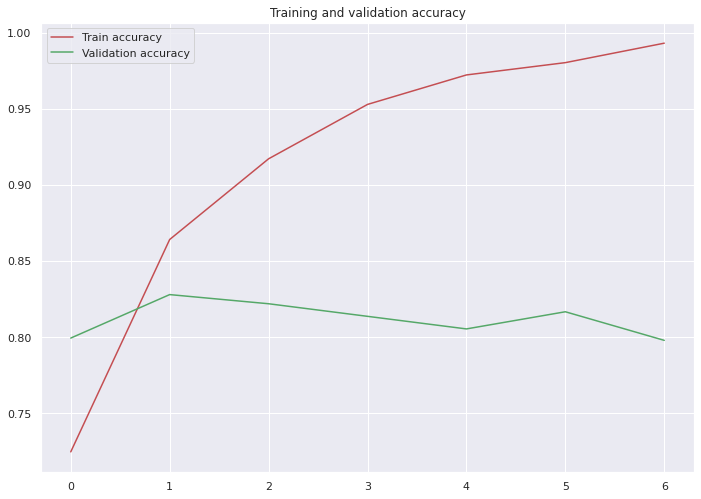

<Figure size 842.4x595.44 with 0 Axes>

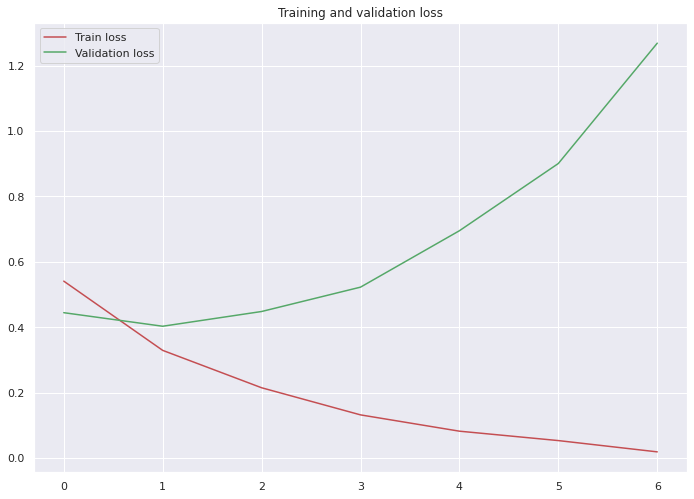

<Figure size 842.4x595.44 with 0 Axes>

In [54]:
# Retrieve Accuracy Value 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
# Taking Loss Value 
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plot Accruracy
plt.plot(epochs, acc, 'r', label='Train accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

# Plot Loss
plt.plot(epochs, loss, 'r', label='Train loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()